In [26]:
from brenda import read_data, write_data, stats
from recherche_chemin import pluscourtchemin
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
from algo_application_brenda import *

In [2]:
sns.set(style="darkgrid", palette="muted", font_scale=1.1)

In [3]:
#@title Extract data
molecularities, molecules, reactifs = stats('data.json')

In [4]:
dataframe = pd.DataFrame()
dataframe['molecules'] = molecules
dataframe['molecularities'] = list(map(lambda x : x[1], molecularities))
dataframe.head(3)

,molecules,molecularities
0,H2O,46706
1,O2,11609
2,ATP,7780


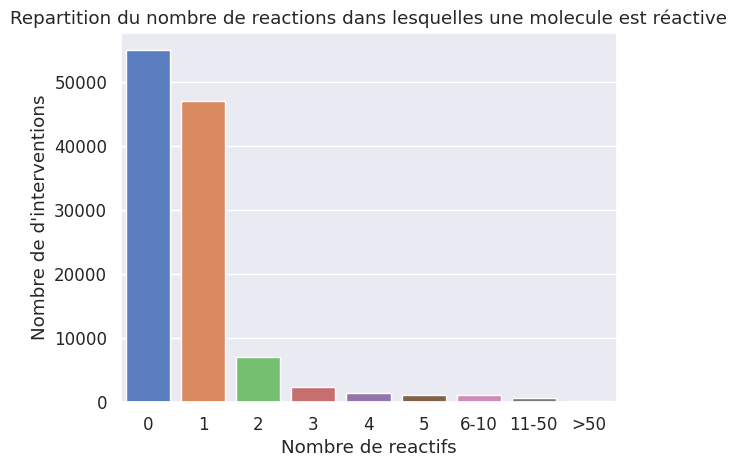

In [5]:
bins = [-1, 0, 1, 2, 3, 4, 5, 10, 50, 47000]
dataframe['cluster'] = pd.cut(dataframe['molecularities'], bins=bins)
df = dataframe['cluster'].value_counts()
df.index = [0, 1, 2,3, 4, 5, "6-10", "11-50", ">50"]
sns.barplot(x=df.index, y=df.values)
plt.title('Repartition du nombre de reactions dans lesquelles une molecule est réactive')
plt.xlabel('Nombre de reactifs')
plt.ylabel('Nombre de d\'interventions')
plt.show()

In [6]:
# Etude du nombre de réactifs dans les réactions
reaction_df = pd.DataFrame()
reaction_df['reactifs'] = list(map(lambda x : x[1], reactifs))
bins_reactifs_count = [-0, 1, 2, 3, 5, 100]
reaction_df['cluster'] = pd.cut(reaction_df['reactifs'], bins=bins_reactifs_count).apply(lambda x : str(x.right) if x.right != 100 else " > 6")
reaction_df.head(3)

,reactifs,cluster
0,6,> 6
1,5,5
2,5,5


In [7]:
df2 = reaction_df['cluster'].value_counts()
# df2['Nombre de reactifs'] =  #bins_reactifs_count[:-1] + ["> " + str(bins_reactifs_count[-1])]
df2.index = ["2", "3", "1", "3-5", ">5"]
df2

2      87367
3      17766
1       7116
3-5     2849
>5         1
Name: count, dtype: int64

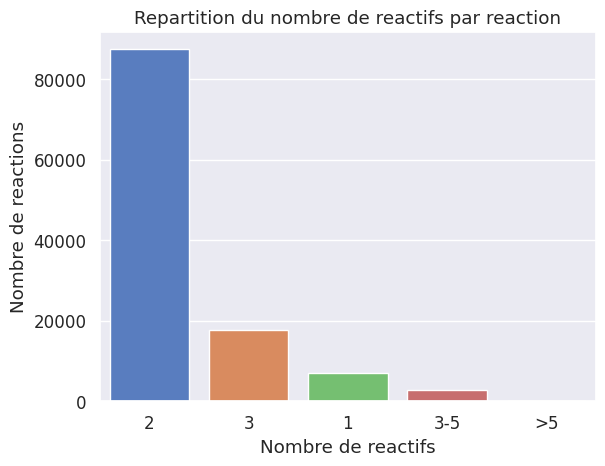

In [8]:
sns.barplot(x=df2.index, y=df2.values)
plt.title('Repartition du nombre de reactifs par reaction')
plt.xlabel('Nombre de reactifs')
plt.ylabel('Nombre de reactions')
plt.show()

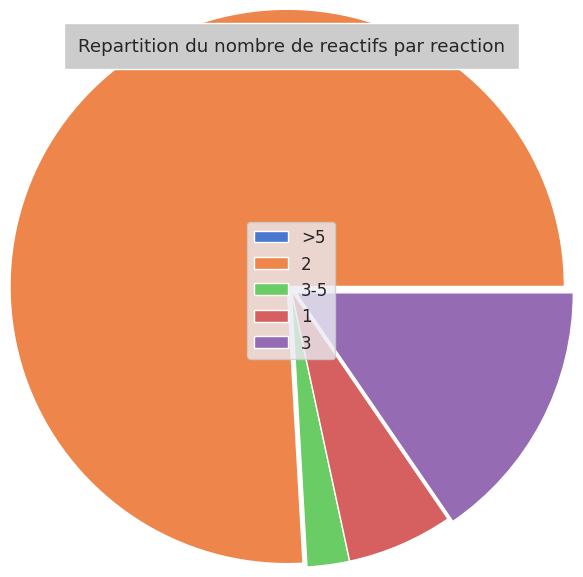

In [9]:
df2 = df2.sample(frac=1)
explode = df2.apply(lambda x : 0.03 * int(x > 17000))
plt.figure(figsize=(8, 6))
plt.pie(df2.values, explode=explode, colors=sns.color_palette(), radius = 1.5)
plt.title('Repartition du nombre de reactifs par reaction', bbox={'facecolor':'0.8', 'pad':10})
plt.legend(df2.index, loc = "center")
# plt.xlabel('Nombre de reactifs')
# plt.ylabel('Nombre de reactions')
plt.show()

In [10]:
data = read_data('data.json')
dic_name_to_idx = data['dic_name_to_idx']
dic_idx_to_name = data['dic_idx_to_name']
reactions = data['reactions']
reactions_per_molecule = data['reactions_per_molecule']
enz = []
reac = [dic_name_to_idx['SAALQSGF-NH2'], dic_name_to_idx['H2O']]
prod = dic_name_to_idx['SAALQ']
n = 50
imprime = True
list_reaction = 'list reaction'

# Pour tester pluscourtchemin : il faut gérér les paramètres...
# mecanisme = pluscourtchemin(enz, reac, prod, n, imprime, list_reaction, dic_idx_to_name, reactions, reactions_per_molecule)

In [11]:
import brenda
data = brenda.read_data('data.json')
dic_idx_to_name = data['dic_idx_to_name']
clusters = data['cluster']
reachables = data['reachable']
frame = pd.DataFrame({
    'clusters': clusters,
    'reachables': [len(elmt) for elmt in reachables],
    'molecule': list(map(lambda x : dic_idx_to_name[str(x)], range(len(dic_idx_to_name))))
})
frame.head(5)

,clusters,reachables,molecule
0,0,0,streptothricin[side 2]
1,32014,2,"(2R)-2,4-dihydroxy-3 3-dimethyl-N-(3-oxo-3-[[(..."
2,2,0,[thymine DNA glycosylase]-L-lysine
3,32014,46,isophthalate
4,4,0,alpha-methyl-4-O-(2-pentenyl)-L-tyrosine


In [34]:
frame['clusters'].value_counts().value_counts()

count
1        51005
2          225
3           75
4           31
5           15
8            9
9            8
6            6
7            5
11           4
15           4
12           2
19           2
58           1
10           1
13           1
17           1
18           1
23           1
25           1
36           1
37           1
63717        1
Name: count, dtype: int64

In [13]:
c.head()

,clusters,reachables,molecule
0,0,0,streptothricin[side 2]
1,32014,2,"(2R)-2,4-dihydroxy-3 3-dimethyl-N-(3-oxo-3-[[(..."
2,2,0,[thymine DNA glycosylase]-L-lysine
3,32014,46,isophthalate
4,4,0,alpha-methyl-4-O-(2-pentenyl)-L-tyrosine
...,...,...,...
116206,116206,0,"(-)benzopyrene4,5-dihydrodiol"
116208,116208,0,"1,2-diacyl-3-erucoylglycerol"
116209,116209,0,bilirubin IXbeta
116210,116210,0,2-aminobenzoyl-LPNT


In [14]:
frame.loc[frame['molecule'] == 'H2O']

,clusters,reachables,molecule
48115,32014,20996,H2O


In [27]:
frame.loc[frame['clusters'] == 32014]

,clusters,reachables,molecule
1,32014,2,"(2R)-2,4-dihydroxy-3 3-dimethyl-N-(3-oxo-3-[[(..."
3,32014,46,isophthalate
6,32014,3,"(8Z,11Z,14Z)-5,6-epoxyeicosatrienoic acid"
10,32014,14,hydrocinnamaldehyde
12,32014,3,N-acetyl-alpha-D-glucosaminyl-diphosphodolichol
...,...,...,...
116201,32014,9,S-prenyl-L-cysteine
116203,32014,15,Pro-opiomelanocortin
116207,32014,1,3-chloro-4-methyl-2-oxo-2H-chromen-7-yl cycloh...
116212,32014,7,decylbenzohydroquinol


In [29]:
frame.loc[frame['clusters'] == 32014].size

191151

Text(0, 0.5, 'Nombre de molecules')

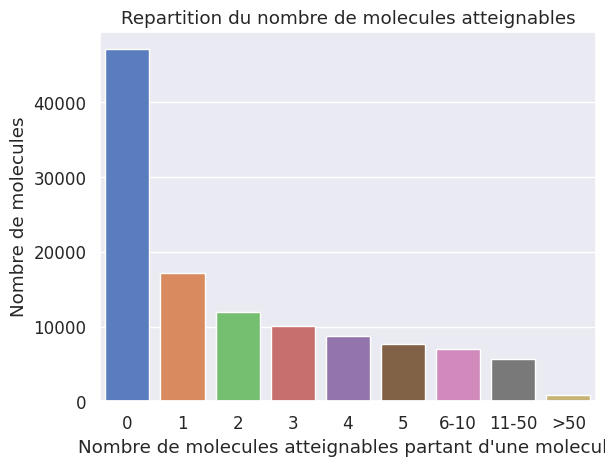

In [17]:
reachable_bins = [-1, 0, 1, 2, 3, 4, 5, 10, 50, 1600]
reach_idx = [0, 1, 2, 3, 4, 5, "6-10", "11-50", ">50"]
reach = pd.cut(frame['reachables'], bins=reachable_bins).value_counts(); reach.index = reach_idx
sns.barplot(x=reach.index, y=reach.values)
plt.title('Repartition du nombre de molecules atteignables')
plt.xlabel('Nombre de molecules atteignables partant d\'une molecule')
plt.ylabel('Nombre de molecules')

On en conclut que partant d'une molécule, n'importe la quelle, on ne peut pas atteindre plus de 50 autres molécules différentes.

Text(0, 0.5, 'Nombre de clusters')

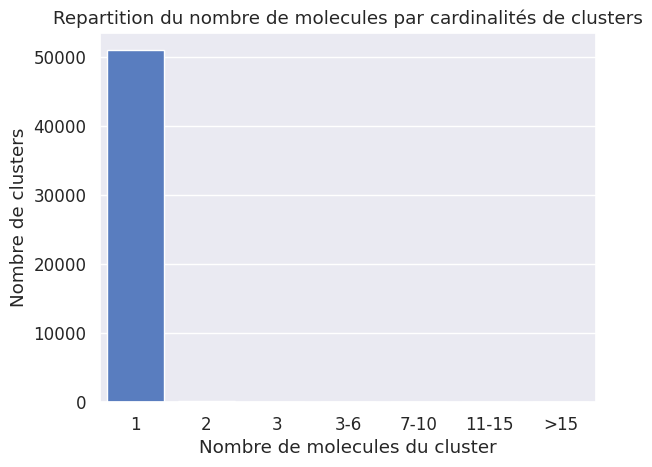

In [18]:
#@ ## Nombre de molecules par cardinalité de clusters
## Un cluster est une liste de molecules qui sont réactives entre elles
clusters_bins = [0, 1, 2, 3, 6, 10, 15, 400000]
cluster_idx   = [   1, 2, 3, '3-6', '7-10', '11-15', '>15']
clusters = pd.cut(frame['clusters'].value_counts(), bins=clusters_bins).value_counts()
clusters.index = cluster_idx
sns.barplot(x=clusters.index, y=clusters.values)
plt.title('Repartition du nombre de molecules par cardinalités de clusters')
plt.xlabel('Nombre de molecules du cluster')
plt.ylabel('Nombre de clusters')
# frame['clusters'].value_counts()

<Axes: >

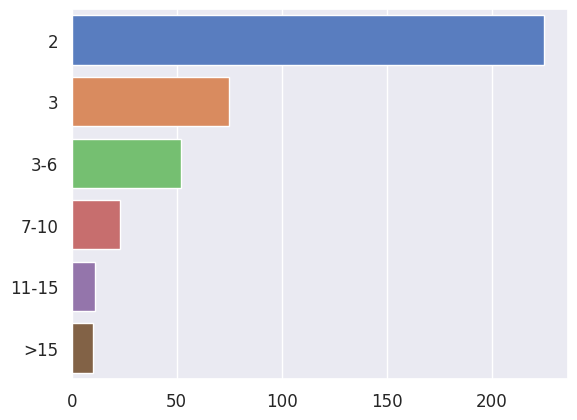

In [19]:
clusters2 = clusters[1:]; clusters2.index = cluster_idx[1:]; clusters2
sns.barplot(x=clusters2.values, y=clusters2.index)

In [20]:
print('Statistiques sur les clusters')
print('Un cluster est constitué de molécules qui sont liées entre elles par des réactions où elles sont réactives')
frame['clusters'].value_counts().describe()

Statistiques sur les clusters
Un cluster est constitué de molécules qui sont liées entre elles par des réactions où elles sont réactives


count    51401.000000
mean         2.260929
std        281.036815
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      63717.000000
Name: count, dtype: float64

On voit **61,795** clusters. Il y a **116,214** molécules. Plusieurs sont seules dans leurs clusters. Ceci ce traduit par le fait que certaines molécules ne participent dans des réactions qu'en tant que produit.

In [21]:
frame['clusters'].value_counts()

clusters
32014     63717
90248        58
32058        37
28379        36
103067       25
          ...  
38671         1
38674         1
38675         1
38679         1
116211        1
Name: count, Length: 51401, dtype: int64

# **Observations générales:**


1.   On a **6.18%** de réactions avec un seul réactif

2.  On a **2.48%** de réactions avec plus de 3 réactifs






In [22]:
print(" Statistiques sur le nombre de reactifs par réaction")
reaction_df['reactifs'].describe()

 Statistiques sur le nombre de reactifs par réaction


count    115099.000000
mean          2.143007
std           0.547331
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           6.000000
Name: reactifs, dtype: float64

In [23]:
print(" Statistiques sur le nombre de réactions par molécule")
dataframe['molecularities'].describe()

 Statistiques sur le nombre de réactions par molécule


count    116214.000000
mean          2.120502
std         146.271316
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max       46706.000000
Name: molecularities, dtype: float64

In [24]:
from algo_application_brenda import brenda



In [25]:
%pwd

'/home/itchomba/Repos/psc'